## Exam vB, PROBLEM 2

In many areas of data science and machine learning we need to produce random samples in different ways. This can be done to compute difficult integrals or validate algorithms. 

1. [2p] Produce 1000 samples from the distribution below using inversion sampling
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \sin(x), & 0 < x < \pi/2 \\
        1, & x \geq \pi/2
    \end{cases}
$$
and show your result with a histogram "You can use sagemath function `histogram`, or `matplotlib.pyplot` `hist`". Also what is the true density? Provide a plot of the true density between 0 and $\pi/2$.

### Answer

We all already given the CDF as $F[x]$, so for inversion sampling we only need to compute

$$
F^{-1}(U) = sin^{-1}(U), U \sim Unif(0,1).
$$

The true density can be derived from the CDF. We know that for a PDF $f$ and a CDF $F$

$$
F(x) = P(X\leq x) = \int_{-\infty}^x f(t) \; dt, \quad x \in \mathbb{R} 
$$

and consequently

$$
f(x) = \frac{d}{fx} F(x) = \begin{cases} cos(x), \quad 0 < x < \pi/2 \\ 0 \quad \quad \quad \; \text{elsewhere} \end{cases}
$$

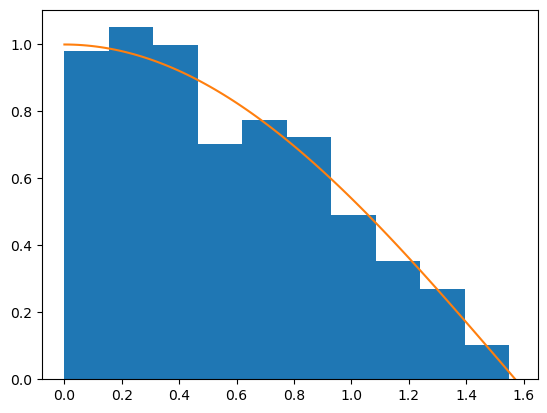

In [1]:
# put your samples in the variable samples
import numpy as np
import matplotlib.pyplot as plt

U = np.random.uniform(low=0, high=1, size=(1000,))
X = [np.arcsin(i) for i in U]

plt.hist(X,density=True,bins=10)

z = np.linspace(0,np.pi/2,100)
plt.plot(z,np.cos(z))

plt.show()
#samples = X

### 2)
Consider a random variable $X \sim F$ sampled from distribution $F$. Your goal is to estimate $E[X]$. Do this by producing 1000 different experiments, each sampling 1000 samples from $X$ and compute the empirical mean. Provide the $0.025$ and the $0.975$ quantile of the experiments.

### Test quantiles function on Gaussian distribution 

In [2]:
testy = np.random.normal(0, 1, 100000)
testQuantile = np.quantile(testy, 0.025)
testQuantile2 = np.quantile(testy, 0.975)
print(testQuantile, testQuantile2)

-1.985160377841166 1.9718003844814016


### Answer

In [3]:
# Produce 1000 experiments, in which each experiment you draw
# 1000 samples from F. Store the value of the empirical mean of each
# experiment and compute the 0.025 and the 0.975 quantiles

def meanFunction():
    U = np.random.uniform(low=0, high=1, size=(1000,))
    X = [np.arcsin(i) for i in U]
    return np.mean(X)

means = [meanFunction() for i in range(1000)]
quantile_0025 = np.quantile(means, 0.025)
quantile_0975 = np.quantile(means, 0.975)
print(quantile_0025,quantile_0975)

0.5463255071202102 0.5940593422989273


### 3)

Use Hoeffdings inequality to produce a 95% confidence interval for the estimated mean above

In [4]:
# Put your interval in the form
from Utils import print_confidence_interval

def calcEpsilon(alpha,n):
     return (1/np.sqrt(n))*np.sqrt((1/2)*np.log(2/(1-alpha)))

eps = calcEpsilon(0.05,1000)
print_confidence_interval(np.mean(means),eps)

l_edge = 0.55 # The left edge of the interval
r_edge = 0.59 # The right edge of the interval
print("Confidence interval around the mean is [%.2f,%.2f]" % (l_edge,r_edge))

[0.55,0.59]
Confidence interval around the mean is [0.55,0.59]
